# Zainab Mohammad


## Research question/interests


**Do either an individual’s age or the amount of music they listen to have an effect on their mental health; which one has a stronger correlation with mental health problems?**

**Of the four mental health conditions (anxiety, depression, OCD, and insomnia), which one is the most prevalent?** 

**How many hours of music do most individuals usually listen to in a day?**

**Does the choice of primary streaming service of music have a correlation with mental health?**

**What correlation do the academic factors of "Year level" and "CGPA" (cumulative GPA) have with depression and anxiety?** 


# Project Milestone 2


I have a profound interest in how various lifestyle factors can influence an individual's health and general well-being. Thus, for this project, my group decided that observing a common lifestyle factor like music and attempting to learn how it may affect an individual's mental health would be a worthwhile idea. Particularly, I have chosen to concentrate on discovering if there is a correlation between an individual's age, the number of hours they spend listening to music every day, and their mental health.


**Analysis Plan:**


I plan on using the "Age" and "Hours per day" columns, as well as the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD". Hence, I will create a new, processed table that only includes six columns, with the data corresponding to these six variables.


Next, I plan to create an "Hours per day in %" column, by expressing the values in the "Hours per day" column as a percentage, using this calculation: (value/24) * 100.


While I will be examining the effects of age and hours of music on each of the four mental health conditions, I will likely also produce visualizations depicting the effects on *overall mental health*. To examine mental health as a whole, I will add the values from the four mental health columns to create an additional "Overall Mental Health" column, which includes the sum of the four columns' values, out of 40. For simplicity, I'll likely further convert this new column such that it is out of 100- this will be done by mulitplying the values in the "Overall Mental Health" column by 2.5.


Since I hope to examine the effects of amount of music listened to per day on mental health, and compare that to the effects of age on mental health, I will likley create ten reshaped datasets. The columns of each dataset will be as such:
- "Hours per day in %", "Anxiety"
- "Hours per day in %", "Depression"
- "Hours per day in %", "Insomnia"
- "Hours per day in %", "OCD"
- "Hours per day in %", "Overall Mental Health"
<br>

- "Age", "Anxiety"
- "Age", "Depression"
- "Age", "Insomnia"
- "Age", "OCD"
- "Age", "Overall Mental Health"



These datasets will be used to produce respective visualizations. The details are yet to be finalized; creating some visualizations first shall allow me to further narrow down my next steps.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

dataset = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv') 

# Project Milestone 3

In [49]:
# Before starting, let's count the total number of rows and columns to see how much data there is

dataset.shape

(736, 33)

In [50]:
# I want to delete certain columns hence first I will print out column list, so I can copy-paste list into next command instead of manually typing out every column name

dataset.columns.values

array(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music effects', 'Permissions'], dtype=object)

In [51]:
# Now, let's drop all columns from dataset except the six I will be working with ("Age", "Hours per day", and the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD")
# I'm naming the adjusted dataset as "filtered"

filtered = dataset.drop(columns=['Timestamp', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects', 'Permissions'])

In [52]:
# Counting how many rows of complete data (non-missing/non-null) there are for each of the six columns in "filtered"

filtered.count()

Age                          735
Primary streaming service    735
Hours per day                736
Anxiety                      736
Depression                   736
Insomnia                     736
OCD                          736
dtype: int64

In [53]:
# Counting how many rows of missing/null data there are for each of the six columns in "filtered" (this is just supportive to the last code) 

filtered.isnull().sum()

Age                          1
Primary streaming service    1
Hours per day                0
Anxiety                      0
Depression                   0
Insomnia                     0
OCD                          0
dtype: int64

In [54]:
# I observed that the "Age" column had one missing/null value, so I am dropping that entire row from my "filtered" dataset
# Naming the adjusted dataset as "filterdrop"

filterdrop = filtered.dropna(subset=['Age', 'Primary streaming service'])

In [55]:
# Checking the data types of each of the six columns in "filterdrop"
print(filterdrop.dtypes)

Age                          float64
Primary streaming service     object
Hours per day                float64
Anxiety                      float64
Depression                   float64
Insomnia                     float64
OCD                          float64
dtype: object


In [56]:
# Specifically checking the data type of "Hours per day" column

type("Hours per day")

str

In [57]:
# I need all my columns to be float data types; all columns except "Hours per day" are, so I'll convert this column to float type next, and then check the dataset's columns' data types again to ensure successful conversion: 

filterdrop_copy = filterdrop.copy()
filterdrop_copy.loc[:, 'Hours per day'] = filterdrop_copy['Hours per day'].astype(float)
filterdrop.dtypes

Age                          float64
Primary streaming service     object
Hours per day                float64
Anxiety                      float64
Depression                   float64
Insomnia                     float64
OCD                          float64
dtype: object

In [58]:
# Next, I want to express the "Hours per day" column as a percentage, so I'll make a new column as such:

filterdrop_copy.loc[:, 'Hours_per_day_in_percentage'] = filterdrop_copy['Hours per day'] / 24 * 100

In [59]:
# Just out of curiousity, I want to check the various statistics of the "filterdrop" dataset

filterdrop_copy.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,734.0,25.212534,12.062188,10.0,18.000000,21.0,28.000000,89.0
Hours per day,734.0,3.571594,3.031795,0.0,2.000000,3.0,5.000000,24.0
Anxiety,734.0,5.829019,2.791967,0.0,4.000000,6.0,8.000000,10.0
Depression,734.0,4.794278,3.029963,0.0,2.000000,5.0,7.000000,10.0
Insomnia,734.0,3.733651,3.086117,0.0,1.000000,3.0,6.000000,10.0
OCD,734.0,2.625341,2.836728,0.0,0.000000,2.0,4.000000,10.0
Hours_per_day_in_percentage,734.0,14.881642,12.632479,0.0,8.333333,12.5,20.833333,100.0


In [60]:
# Next, I want to express the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD", as an overall mental health column, and give its values as a number out of 100:

filterdrop_copy.loc[:, 'Overall_Mental_Health_out_of_100'] = (filterdrop['Anxiety'] + filterdrop['Depression'] + filterdrop['Insomnia'] + filterdrop['OCD']) * 2.5

In [61]:
# I will rename all the columns whose names are multiple words, such that the column name becomes just one word- this makes everything more efficient and reduces errors:

filterdrop_copy = filterdrop_copy.rename(columns={'Primary streaming service': 'Primary_streaming_service'})
filterdrop_copy = filterdrop_copy.rename(columns={'Hours per day': 'Hours_per_day'}) 

In [71]:
# Now, I  can start generating multiple tables to aid with visualizations 

df1 = datasetchain2[["Hours_per_day_percentage", "Anxiety"]]

In [72]:
df2 = datasetchain2[["Hours_per_day_percentage", "Depression"]]

In [73]:
df3 = datasetchain2[["Hours_per_day_percentage", "Insomnia"]]

In [74]:
df4 = datasetchain2[["Hours_per_day_percentage", "OCD"]] 

In [75]:
df5 = datasetchain2[["Hours_per_day_percentage", "Overall_Mental_Health_out_of_100"]]

In [76]:
df6 = datasetchain2[["Age", "Anxiety"]]

In [77]:
df7 = datasetchain2[["Age", "Depression"]]

In [78]:
df8 = datasetchain2[["Age", "Insomnia"]]

In [79]:
df9 = datasetchain2[["Age", "OCD"]]

In [80]:
df10 = datasetchain2[["Age", "Overall_Mental_Health_out_of_100"]]

(0.0, 100.0)

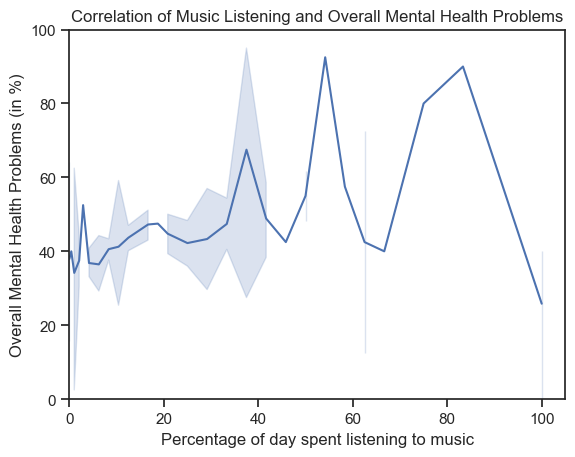

In [81]:
# Now that all 10 graphs are made, let's make visualizations from graph 5 and graph 10, to visualize the correlation between their respective columns

sns.set_theme(style="ticks")
plot3=sns.lineplot(data=df5, x="Hours_per_day_percentage", y="Overall_Mental_Health_out_of_100")
plot3.set(xlabel="Percentage of day spent listening to music", ylabel="Overall Mental Health Problems (in %)", title="Correlation of Music Listening and Overall Mental Health Problems") 
plot3.set_xlim(0, None)
plot3.set_ylim(0, 100)

(0.0, 100.0)

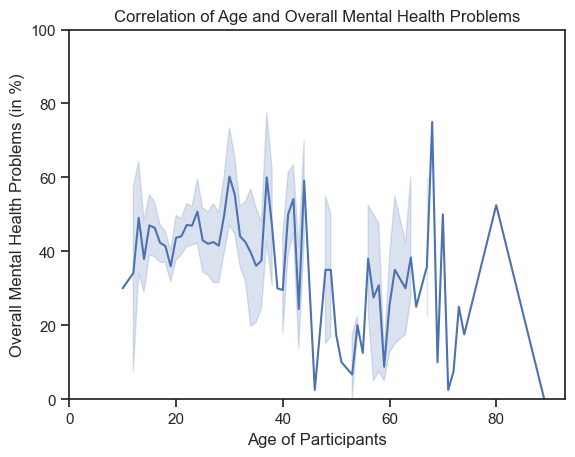

In [83]:
sns.set_theme(style="ticks")
plot4=sns.lineplot(data=df10, x="Age", y="Overall_Mental_Health_out_of_100")
plot4.set(xlabel="Age of Participants", ylabel="Overall Mental Health Problems (in %)", title="Correlation of Age and Overall Mental Health Problems") 
plot4.set_xlim(0, None)
plot4.set_ylim(0, 100)

My research questions revolve around trying to learn if there is correlation between an individual's age and their mental health, and between the amount of music they listen to and their mental health; if so, I am curious which factor has a stronger correlation with mental health?

Plots 3 and 4 both utilized lineplots to roughly visualize how either amount of music or age correlate to overall mental health problems. Plot 3 shows that listening to more music and increased mental health problems had a correlation, although the highest amount of music listened to led to a decrease in mental health problems. Overall, this graph shows many ups and downs, so more complex visualizations will likely be needed to better understand the correlation.
Plot 4 showed an overall decline in overall mental health problems at older ages, suggesting a possible negative correlation between the two variables. However, a flaw comes from the popular phrase that "correlation does not imply causation"; is it really the increase in age that leads to reduced mental health problems? Overall, applying more complex visualizations to this graph to better illustrate the negative correlation may be helpful, and of course realistically no conclusions can be made just from this dataset; future studies would be needed to observe the true cause(s) of any correlation observed.

Perhaps for the next steps, I will use a jointplot for better illustrations. 
Also, I now realize that perhaps analyzing mental health as a whole using the "Overall Mental Health" column may not be very transparent. Thus, for my next steps I am planning to visualize each mental health column (Anxiety, Depression, Insomnia, and OCD) with Age and with Amount of music listened to, to figure out how those correlate, and then I will display those via a Facet plot to better see which variables have the strongest correlations. As for creation of new columns or more data aggregation, I don't feel that is further needed at this point. 

Plots 1 and 2 were used to visualize the spread of the age and amount of music listened to by the participants of the survey, and they indicated that the highest prevalence was of individuals aged just less than 20, and most individuals listened to music for about 10% of their day. I am now considering making graphs to show a relationship between these two variables as well, to see if there is any correlation between these two, as that could be interesting to know as well. 

### Revised Research Questions: 

**Do either an individual’s age or the amount of music they listen to have an effect on their mental health; which one has a stronger correlation with mental health problems?**


# **Project Milestone 4**

## Task 1: Analysis Pipeline

In [63]:
# Let's check the file type of the dataset
import os
import mimetypes as mmt

filename = "music_therapy_and_mental_health_survey_results (1).csv"
filetype = mmt.guess_type(filename)[0]

if filetype is not None:
    print(f"The file type of this file is: {filetype}")
else:
    print(f"Was not able to successfully determine the file type of '{filename}'")

The file type of this file is: application/vnd.ms-excel


In [ ]:
# Hmm, all columns are floats except "Primary streaming service" which is an object (string), so let's convert all strings to numbers using a function and make a new column where this column's values are expressed as numbers:
# Here's the function 
#def Primarystreamingservice(x):


In [ ]:
# Mental health rankings are subjective, so I will not delete any outliers here. Age values look appropriate. The remaining two columns are alright too; for "hours per day in %", 100% is quite high but perhaps this individual has music playing 24/7, even during sleep? We can keep it just to see if any interesting trends are observed

## Task 2: Method Chaining

In [69]:
# Step 3:

def Primarystreamingservice(x):
    '''
    This function analyzes the given primary streaming service type, and assigns it a numerical value accordingly (numbers are easier to work with).
    '''
    if x['Primary streaming service']=="Spotify":
        return "1"
    elif x['Primary streaming service']=="Pandora": 
        return "2"  
    elif x['Primary streaming service']=="YouTube Music":
        return "3"
    elif x['Primary streaming service']=="Apple Music": 
        return "4"  
    elif x['Primary streaming service']=="I do not use a streaming service.":
        return "5"
    else: 
        return "6"  


import scripts
from scripts import project_functions_Zainab as pt 

datasetchain2 = pt.load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
datasetchain2

,Age,Primary streaming service,Primary_streaming_service_in_numbers,Hours_per_day_percentage,Anxiety,Depression,Insomnia,OCD,Overall_Mental_Health_out_of_100
0,18.0,Spotify,1,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1,20.833333,2.0,3.0,2.0,1.0,20.0


In [70]:
datasetchain2.to_csv('../data/processed/analysisZainabdataset1.csv', index=False)

## Task 3: Visualizations & Analysis

Let's make a more complex visualization to compare hours spent listening to music per day and overall mental health. I will use a jointplot: 

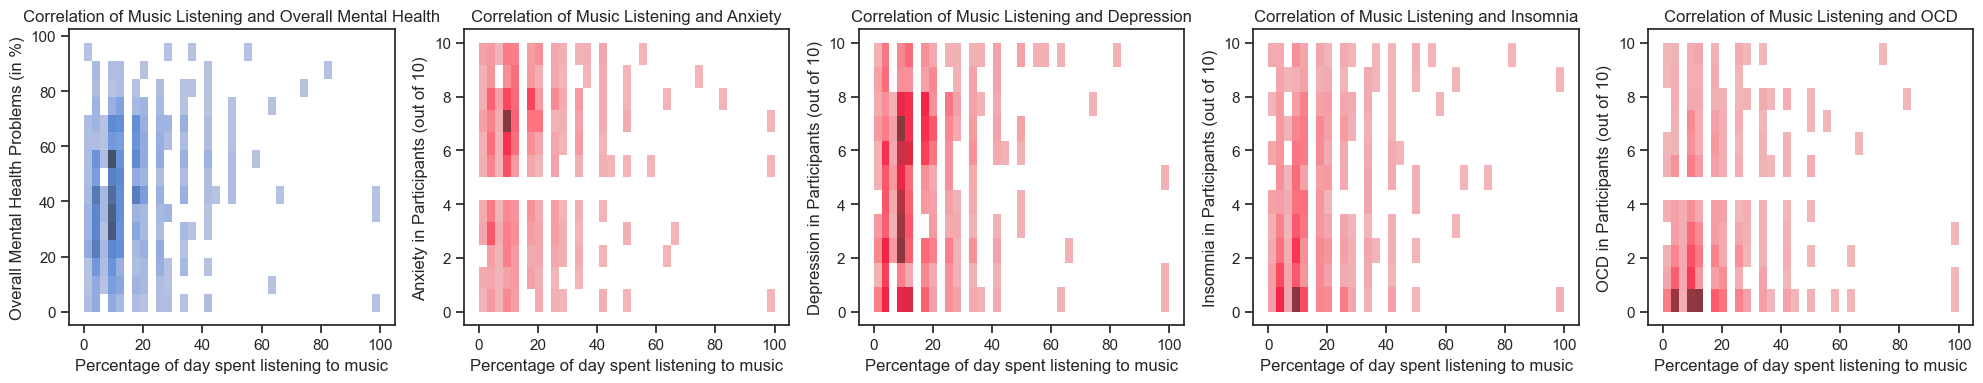

In [84]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))

sns.histplot(data=df5, x="Hours_per_day_percentage", y="Overall_Mental_Health_out_of_100", kde=True, ax=axs[0])
axs[0].set_xlabel('Percentage of day spent listening to music')
axs[0].set_ylabel('Overall Mental Health Problems (in %)')
axs[0].set_title('Correlation of Music Listening and Overall Mental Health')

sns.histplot(data=df1, x="Hours_per_day_percentage", y="Anxiety", kde=True, color='crimson', ax=axs[1])
axs[1].set_xlabel('Percentage of day spent listening to music')
axs[1].set_ylabel('Anxiety in Participants (out of 10)')
axs[1].set_title('Correlation of Music Listening and Anxiety')

sns.histplot(data=df2, x="Hours_per_day_percentage", y="Depression", kde=True, color='crimson', ax=axs[2])
axs[2].set_xlabel('Percentage of day spent listening to music')
axs[2].set_ylabel('Depression in Participants (out of 10)')
axs[2].set_title('Correlation of Music Listening and Depression')

sns.histplot(data=df3, x="Hours_per_day_percentage", y="Insomnia", kde=True, color='crimson', ax=axs[3])
axs[3].set_xlabel('Percentage of day spent listening to music')
axs[3].set_ylabel('Insomnia in Participants (out of 10)')
axs[3].set_title('Correlation of Music Listening and Insomnia')

sns.histplot(data=df4, x="Hours_per_day_percentage", y="OCD", kde=True, color='crimson', ax=axs[4])
axs[4].set_xlabel('Percentage of day spent listening to music')
axs[4].set_ylabel('OCD in Participants (out of 10)')
axs[4].set_title('Correlation of Music Listening and OCD')

fig.tight_layout()

plt.show()


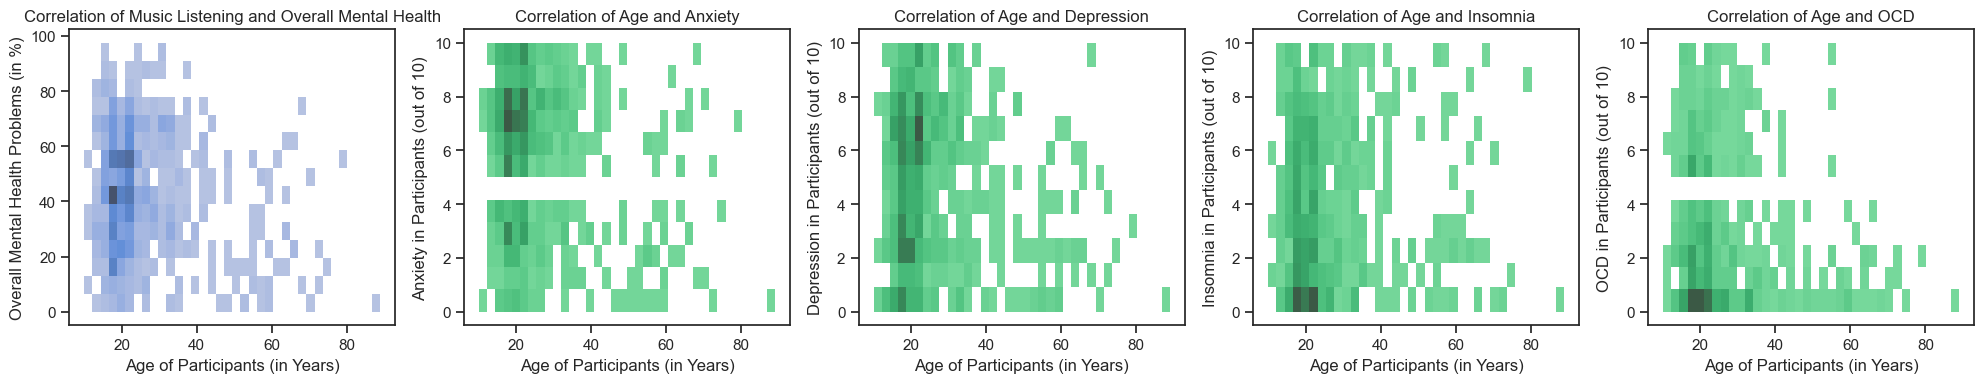

In [85]:
import matplotlib.pyplot as plt

fig, axs2 = plt.subplots(ncols=5, figsize=(20, 4))

# Plot the first jointplot on the first subplot
sns.histplot(data=df10, x="Age", y="Overall_Mental_Health_out_of_100", kde=True, ax=axs2[0])
axs2[0].set_xlabel('Age of Participants (in Years)')
axs2[0].set_ylabel('Overall Mental Health Problems (in %)')
axs2[0].set_title('Correlation of Music Listening and Overall Mental Health')

sns.histplot(data=df6, x="Age", y="Anxiety", kde=True, color='seagreen', ax=axs2[1])
axs2[1].set_xlabel('Age of Participants (in Years)')
axs2[1].set_ylabel('Anxiety in Participants (out of 10)')
axs2[1].set_title('Correlation of Age and Anxiety')

sns.histplot(data=df7, x="Age", y="Depression", kde=True, color='seagreen', ax=axs2[2])
axs2[2].set_xlabel('Age of Participants (in Years)')
axs2[2].set_ylabel('Depression in Participants (out of 10)')
axs2[2].set_title('Correlation of Age and Depression')

sns.histplot(data=df8, x="Age", y="Insomnia", kde=True, color='seagreen', ax=axs2[3])
axs2[3].set_xlabel('Age of Participants (in Years)')
axs2[3].set_ylabel('Insomnia in Participants (out of 10)')
axs2[3].set_title('Correlation of Age and Insomnia')

sns.histplot(data=df9, x="Age", y="OCD", kde=True, color='seagreen', ax=axs2[4])
axs2[4].set_xlabel('Age of Participants (in Years)')
axs2[4].set_ylabel('OCD in Participants (out of 10)')
axs2[4].set_title('Correlation of Age and OCD')

fig.tight_layout()

plt.show()

Interesting, it seems like most of the survey individuals listened to music for about 10% of the day, and the highest density of the plot is at about 25-45 for the y-axis, indicating that most of the survey-takers feel their mental health problems are relatively low, at about 35%. As for a trend, it seems there may be a **minimal effect of "percentage of day spent listening to music" on overall mental health problems**, as seen by the relatively equal scattering of points in a straight vertical manner on the graph (the vertical direction representing how different survey-takers ranked their mental health all over across the scale for a given "% of day spent listening to music", indicating that listening to music for a certain amount of time does not seem to cause more or less mental health problems). 

Next, let's make a more complex visualization to compare age and overall mental health. I will use a jointplot again: 

Interesting, it seems like most of the survey individuals were younger folks, and the highest density of the plot is at about 40 and 55, meaning these were the most common "Overall health" percentages. 
More importantly, for trends, it seems there may be a minimal effect of **"Age of Participants" on overall mental health problems**, as seen by the relatively equal scattering of points in a straight vertical manner on the graph (representing the relatively equal spread of overall mental health problems percentages for a given age, indicating that being a certain age does not lead to less or more mental health problems). However, as age increases, it can be seen that more points are towards the lower end of the spectrum of "Overall Mental Healthy Problems"- which indicates that **as the age of a human increases, their mental health improves**. Further studies need to be done to confirm this conclusion.


Next, let's visualize each mental health condition (4) with either "Age" or "% of day spent listening to music"- there will be 8 jointplots ahead:

With these new graphs, there are still no prominently significant effects of "% of music listened to in a day" on each of the four mental health conditions; it appears that the prevalence of the mental health problems are similar regardless of if individuals are listening to more or less music. Therefore, **it may be concluded from these results that amount of music listened to in a day and the various mental health conditions do not have a correlation**.  

For age and its correlation to mental health, age seems to have minimal effects on the mental health conditions Anxiety and Insomnia. However, the "Correlation of Age and OCD" and especially the "Correlation of Age and Depression" graphs both display how with increasing age, the overall ranking of OCD and Depression was lower. **This data allows us to conclude that increasing age may have a negative correlation with age, such that higher age leads to lower depression and OCD**.

**Therefore, it can finally be stated that an individual’s age has a stronger correlation with certain mental health conditions- depression and OCD, than does the amount of music they listen to.**

>To test my second question, "**How does quantity of music listening vary across age groups?**", I will plot a displot, as well as a jointplot:   **Will probably delete this question**

Will probably delete this since I no longer want to keep this question:
Based on the previous visualization, I can tackle the second question. The Facet Grid showed how the highest counts of music listening for people of ages 16, 17, especially 18, 19, 20, 21, 22, and 23. People aged 24-32 also listened to music, but less than the 16-23 year olds. People aged 33-38 have even lower counts, and people older than 38 have very low counts of music listeners. This data is generally supported by the jointplot, which shows the higest concentration of music listeners at age ~20, and gradually lower concentrations at higher ages; this is further supported by the bars on the joinplots too. 
Therefore, **it can be concluded that according to this dataset, younger people tend to listen to music more, and this activity decreases as age increases. More specifically, 16 is the peak age at which people listen to music the most**. It should be noted that there is possible bias in this conclusion, since majority of the survery-takers were younger. Further surveys of older populations can help remove the bias from this conclusion. 

## Additional questions

Since I have rather simple results, I can do further exploring. I have another question: **How many hours of music do most individuals usually listen to in a day?**  

I will create a displot to observe what the most common number of hours of music listened to in a day popular:

(0.0, 187.95)

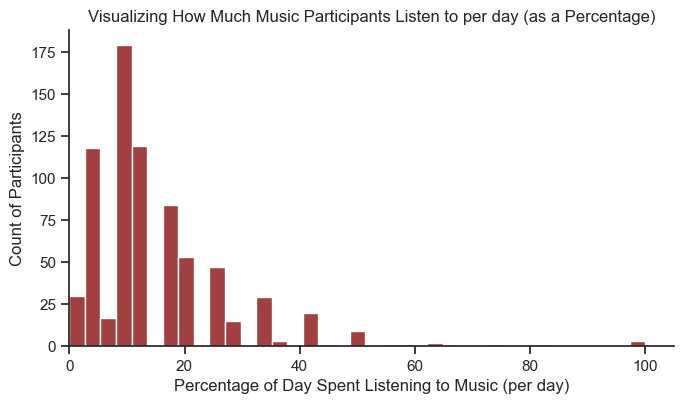

In [86]:
# Let's visualize the "Hours per day in %" column to see the spread of how much music the participants of this survey listen to per day

sns.set_theme(style="ticks")
plot2=sns.displot(data=datasetchain2, x="Hours_per_day_percentage", color="maroon", height=4, aspect=1.75)
plot2.set(xlabel="Percentage of Day Spent Listening to Music (per day)", ylabel="Count of Participants", title="Visualizing How Much Music Participants Listen to per day (as a Percentage)") 
plot2.facet_axis(0, 0).set_xlim(0, None)
plot2.facet_axis(0, 0).set_ylim(0, None)

Based on the survery-takers, these number of hours of music were most common: 1.0, 2.0, and 3.0. From these three, 2.0 hours had the highest count. Therefore, this result can be extended to the general public, and it can be concluded that **in general, people typically spend two hours per day listening to music, which is the most common duration**. 

Next additional question: **Of the four mental health conditions, which one is the most prevalent?** 

For answering this question, I will create a boxplot that includes all four mental health conditions, and displays their numerical stats:

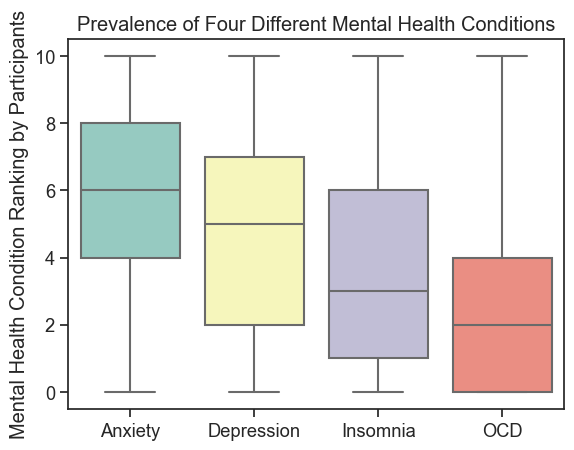

In [87]:
sns.set_theme(style="ticks", palette="deep", font_scale=1.2)

sns.boxplot(data=datasetchain2[['Anxiety', 'Depression', 'Insomnia', 'OCD']], palette='Set3')
plt.xlabel("")
plt.ylabel("Mental Health Condition Ranking by Participants")
plt.title("Prevalence of Four Different Mental Health Conditions")
plt.show() 

The main result of the barplot above is that it shows the interquartile range (IQR) of the prevalence of each of the four mental health conditions in the survey-takers. A score of 0 indicates lack of the mental health condition, while a score of 10 indicates high levels of mental health condition. **The barplot shows that Anxiety has the highest IQR, meaning that overall, the survey-takers reported highest levels of this condition. Depression was ranked lower, insomnia even lower, and OCD was ranked the lowest**. This indicates that of these four mental health conditions, **anxiety is the most prevalent in our society, therefore more focus should be paid towards providing resources and therapy for this condition**, compared to the other three. 

My next question is: **Does the choice of primary streaming service of music have a correlation with mental health?**

C:\Users\12508\AppData\Local\Temp\ipykernel_15064\4032549477.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot1 = counts1.pivot('Primary_streaming_service_in_numbers', 'Anxiety', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_15064\4032549477.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot2 = counts2.pivot('Primary_streaming_service_in_numbers', 'Depression', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_15064\4032549477.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot3 = counts3.pivot('Primary_streaming_service_in_numbers', 'Insomnia', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_15064\4032549477.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot4 = counts4.pivot('Primary_streaming_service_in_numbers', 'OCD', 

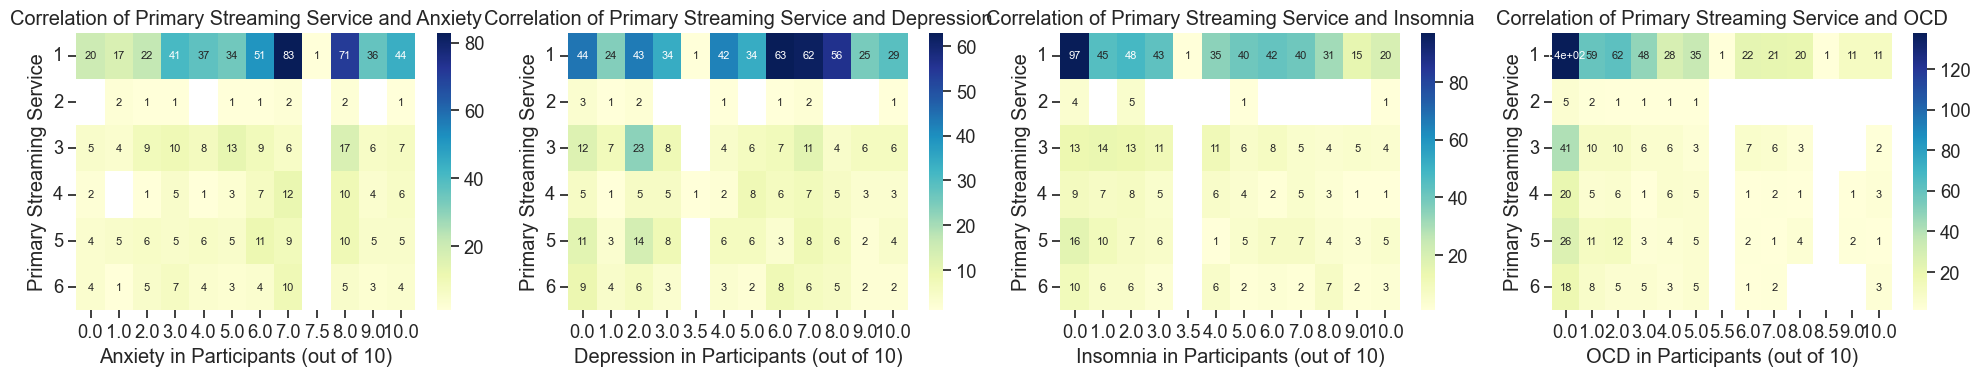

In [88]:
counts1 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Anxiety']).size().reset_index(name='count')
pivot1 = counts1.pivot('Primary_streaming_service_in_numbers', 'Anxiety', 'count')

counts2 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Depression']).size().reset_index(name='count')
pivot2 = counts2.pivot('Primary_streaming_service_in_numbers', 'Depression', 'count')

counts3 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Insomnia']).size().reset_index(name='count')
pivot3 = counts3.pivot('Primary_streaming_service_in_numbers', 'Insomnia', 'count')

counts4 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'OCD']).size().reset_index(name='count')
pivot4 = counts4.pivot('Primary_streaming_service_in_numbers', 'OCD', 'count')

fig, axs = plt.subplots(ncols=4, figsize=(20, 4))

heatmap1 = sns.heatmap(pivot1, annot=True, cmap='YlGnBu', ax=axs[0], annot_kws={"fontsize":8})
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), rotation=0)
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), rotation=0)
axs[0].set_xlabel('Anxiety in Participants (out of 10)')
axs[0].set_ylabel('Primary Streaming Service')
axs[0].set_title('Correlation of Primary Streaming Service and Anxiety')

heatmap2 = sns.heatmap(pivot2, annot=True, cmap='YlGnBu', ax=axs[1], annot_kws={"fontsize":8})
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), rotation=0)
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), rotation=0)
axs[1].set_xlabel('Depression in Participants (out of 10)')
axs[1].set_ylabel('Primary Streaming Service')
axs[1].set_title('Correlation of Primary Streaming Service and Depression')

heatmap3 = sns.heatmap(pivot3, annot=True, cmap='YlGnBu', ax=axs[2], annot_kws={"fontsize":8})
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), rotation=0)
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), rotation=0)
axs[2].set_xlabel('Insomnia in Participants (out of 10)')
axs[2].set_ylabel('Primary Streaming Service')
axs[2].set_title('Correlation of Primary Streaming Service and Insomnia')

heatmap4 = sns.heatmap(pivot4, annot=True, cmap='YlGnBu', ax=axs[3], annot_kws={"fontsize":8})
heatmap4.set_xticklabels(heatmap4.get_xticklabels(), rotation=0)
heatmap4.set_yticklabels(heatmap4.get_yticklabels(), rotation=0)
axs[3].set_xlabel('OCD in Participants (out of 10)')
axs[3].set_ylabel('Primary Streaming Service')
axs[3].set_title('Correlation of Primary Streaming Service and OCD')

fig.tight_layout()

plt.show()


C:\Users\12508\AppData\Local\Temp\ipykernel_15064\1986947473.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot1 = counts1.pivot('Primary_streaming_service_in_numbers', 'Anxiety', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_15064\1986947473.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot2 = counts2.pivot('Primary_streaming_service_in_numbers', 'Depression', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_15064\1986947473.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot3 = counts3.pivot('Primary_streaming_service_in_numbers', 'Insomnia', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_15064\1986947473.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot4 = counts4.pivot('Primary_streaming_service_in_numbers', 'OCD', 

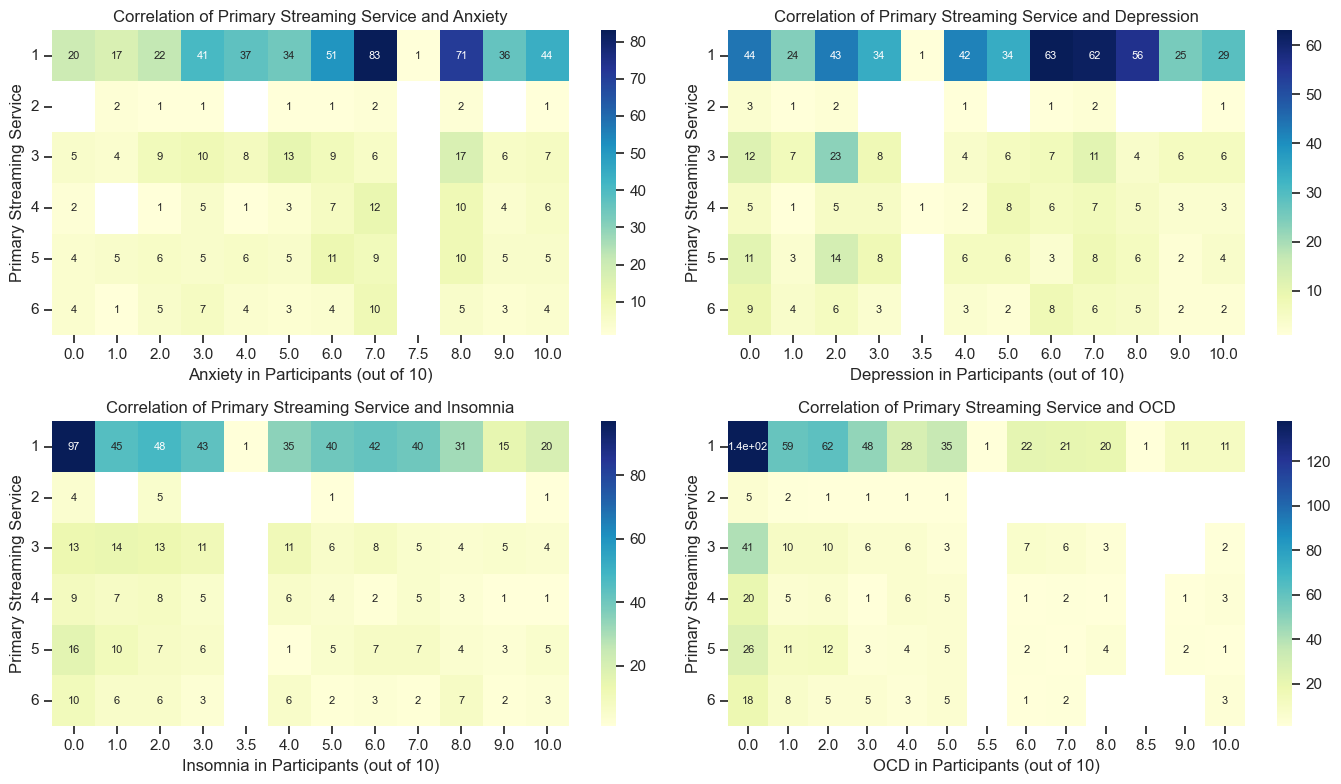

<Figure size 640x480 with 0 Axes>

In [107]:
counts1 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Anxiety']).size().reset_index(name='count')
pivot1 = counts1.pivot('Primary_streaming_service_in_numbers', 'Anxiety', 'count')

counts2 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Depression']).size().reset_index(name='count')
pivot2 = counts2.pivot('Primary_streaming_service_in_numbers', 'Depression', 'count')

counts3 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Insomnia']).size().reset_index(name='count')
pivot3 = counts3.pivot('Primary_streaming_service_in_numbers', 'Insomnia', 'count')

counts4 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'OCD']).size().reset_index(name='count')
pivot4 = counts4.pivot('Primary_streaming_service_in_numbers', 'OCD', 'count')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

heatmap1 = sns.heatmap(pivot1, annot=True, cmap='YlGnBu', ax=axs[0,0], annot_kws={"fontsize":8})
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), rotation=0)
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), rotation=0)
axs[0,0].set_xlabel('Anxiety in Participants (out of 10)')
axs[0,0].set_ylabel('Primary Streaming Service')
axs[0,0].set_title('Correlation of Primary Streaming Service and Anxiety')

heatmap2 = sns.heatmap(pivot2, annot=True, cmap='YlGnBu', ax=axs[0,1], annot_kws={"fontsize":8})
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), rotation=0)
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), rotation=0)
axs[0,1].set_xlabel('Depression in Participants (out of 10)')
axs[0,1].set_ylabel('Primary Streaming Service')
axs[0,1].set_title('Correlation of Primary Streaming Service and Depression')

heatmap3 = sns.heatmap(pivot3, annot=True, cmap='YlGnBu', ax=axs[1,0], annot_kws={"fontsize":8})
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), rotation=0)
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), rotation=0)
axs[1,0].set_xlabel('Insomnia in Participants (out of 10)')
axs[1,0].set_ylabel('Primary Streaming Service')
axs[1,0].set_title('Correlation of Primary Streaming Service and Insomnia')

heatmap4 = sns.heatmap(pivot4, annot=True, cmap='YlGnBu', ax=axs[1,1], annot_kws={"fontsize":8})
heatmap4.set_xticklabels(heatmap4.get_xticklabels(), rotation=0)
heatmap4.set_yticklabels(heatmap4.get_yticklabels(), rotation=0)
axs[1,1].set_xlabel('OCD in Participants (out of 10)')
axs[1,1].set_ylabel('Primary Streaming Service')
axs[1,1].set_title('Correlation of Primary Streaming Service and OCD')

fig.tight_layout()

plt.show()

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph2.png')

(explain the y axis)

The heatmaps above represent the spread of how users of different primary streaming services rated their anxiety, depression, insomnia, and OCD. 
(describe results/mode values)

# Dataset 2

In [92]:
# I have added a new short dataset because I am curious to see how mental health varies in students

datasetsmh = pd.read_csv('../data/raw/Student_mental_health.csv')

In [91]:
# Let's see all the columns in this new dataset
datasetsmh.columns.values

array(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?',
       'Marital status', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'], dtype=object)

In [93]:
# From the list, I am interested in the "Do you have Depression?", "Do you have Anxiety?", "Your current year of Study", and "What is your cGPA?" columns so I will drop all the rest

dataset_smh = datasetsmh.drop(columns=['Timestamp', 'Choose your gender', 'Age', 'What is your course?', 'Marital status', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?'])

In [94]:
# Checking the data types of each of the four columns

print(dataset_smh.dtypes)

Your current year of Study    object
What is your CGPA?            object
Do you have Depression?       object
Do you have Anxiety?          object
dtype: object


In [95]:
# They are all objects, so I will use functions to convert them all to numerical values if needed during my visualizations. First let's check what all the unique values in each column are

dataset_smh['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [96]:
# I don't want to differentiate between lower and upper case, so let's fix that issue by converting all values to lower case:

dataset_smh['Your current year of Study'] = dataset_smh['Your current year of Study'].str.lower()
dataset_smh['Your current year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [97]:
# Perfect. Now let's check the unique values of the next column 
dataset_smh['What is your CGPA?'].unique()  

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [98]:
# The '3.50 - 4.00' value appears twice since someone entered a space after, so let's fix this by using strip, which will ignore whitespace:

dataset_smh['What is your CGPA?'] = dataset_smh['What is your CGPA?'].str.strip()
dataset_smh['What is your CGPA?'].unique()  

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [99]:
# Now checking unique values of the depression and anxiety columns:
dataset_smh['Do you have Depression?'].unique()  

array(['Yes', 'No'], dtype=object)

In [100]:
dataset_smh['Do you have Anxiety?'].unique()  

array(['No', 'Yes'], dtype=object)

In [ ]:
# Time for the functions, first I'll make them for the depression and anxiety columns, where Yes = 1 and No = 0. I'll only use these if I need them during visualizations/analysis:

def depression(x):
    '''
    This function analyzes the "Do you have Depression?" column, and assigns the categorical values numerical values accordingly (numbers are easier to work with). Yes = 1 and No = 0.
    '''
    if x['Do you have Depression?']=="Yes":
        return "1"
    else: 
        return "0"  

In [ ]:
# dataset_smh['Do you have Depression?']= dataset_smh.apply(depression, axis='columns')
#dataset_smh

In [ ]:
# Making the function for anxiety column, where Yes = 1 and No = 0:

def anxiety(x):
    '''
    This function analyzes the "Do you have Anxiety?" column, and assigns the categorical values numerical values accordingly (numbers are easier to work with). Yes = 1 and No = 0.
    '''
    if x['Do you have Anxiety?']=="Yes":
        return "1"
    else: 
        return "0"  

In [ ]:
# dataset_smh['Do you have Anxiety?']= dataset_smh.apply(anxiety, axis='columns')
# dataset_smh

In [101]:
# Stacking the anxiety and depression columns into a single column

melted_dataset_smh = pd.melt(dataset_smh, id_vars=['What is your CGPA?', 'Your current year of Study'], value_vars=['Do you have Anxiety?', 'Do you have Depression?'], var_name='Question', value_name='Mental Health Problem:')

In [102]:
melted_dataset_smh.to_csv('../data/processed/analysisZainabdataset2.csv', index=False)

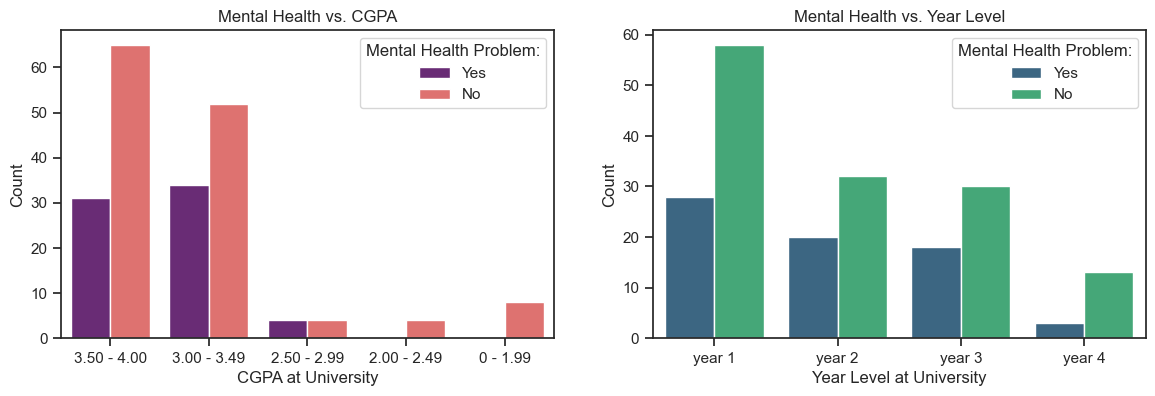

<Figure size 640x480 with 0 Axes>

In [105]:
# Creating a figure with two subplots

figure, academics = plt.subplots(ncols=2, figsize=(14, 4))

sns.set_theme(style="ticks")
sns.countplot(data=melted_dataset_smh, x="What is your CGPA?", hue="Mental Health Problem:", palette='magma', hue_order=['Yes', 'No'], order=['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], ax=academics[0])
academics[0].set_xlabel('CGPA at University')
academics[0].set_ylabel('Count')
academics[0].set_title('Mental Health vs. CGPA')

sns.countplot(data=melted_dataset_smh, x="Your current year of Study", hue="Mental Health Problem:", palette='viridis', hue_order=['Yes', 'No'], ax=academics[1])
academics[1].set_xlabel('Year Level at University')
academics[1].set_ylabel('Count')
academics[1].set_title('Mental Health vs. Year Level')

plt.show()

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph3.png')

This previous countplot shows the ratio of people saying they do or do not have depression with varying CGPA ranges. It can be seen that the students with the highest CGPA have the lowest ratio of having depression vs. not having depression- almost twice as many students said they don't have depression as those who said they do have depression. The students with the second highest range of CGPA, 3.00-3.49, have a much higher ratio; the number of students saying they have depression is almost equal to those saying they don't. For the third range of CGPA of 2.50-2.99, the ratio is even higher; more students said they have depression than those who said they do not. For the last two, lowest CGPA ranges, the only responses were "No" to depression.  

**Answering the question: What correlation do the factors of "Year level" and "CGPA" have with depression and anxiety?**

This "Depression vs. CGPA" countplot showed that **as CGPA decreased, a higher ratio of students tended to state that they had depression**. This shows a strong correlation between a student's grades and their levels of depression. It should be noted that the students from the two lowest CPGA ranges stated they did not have depression; this might either be incorrect due to the sample size, or perhaps students with CGPAs this low simply do not care about academics, hence why a low CGPA does not affect them or their mental health. 

For the "Anxiety vs. CGPA" countplot, it can be seen that the ratio of students having anxiety vs. not having it stayed relatively similar throughout the different CGPA ranges, suggesting that **a lower CGPA does not necessarily increase or decrease student anxiety levels**.

The "Depression vs. Year Level" countplot represents the ratio of having depression vs. not having it to be the lowest in Years 1 and 4, a bit higher in Year 2, and the highest in Year 3, **meaning that students are most depressed in Year 3**. It is logical that first year students have the least depression since they are still learning about their university, meeting new people, and experiencing new things, which is fun and induces happiness. By second year, the stress of their rigorous academics begins to kick in, and by third year it worsens as courses get more difficult, which brings feelings of hopelessness and depression. Interestingly, the ratio decreased in Year 4 students- perhaps, it is because by this point they have accepted the academic lifestyle so they are not as depressed, and perhaps there is new-found happiness due to being close to graduating.

The "Anxiety vs. Year Level" countplot represents the ratio of having anxiety vs. not having it to be the lowest in Year 4, a bit higher in Years 1 and 3, and the highest in Year 2, meaning that **students are most anxious in Year 2**. It makes sense that Year 4 students have the least anxiety, since they are close to graduating. It is also logical that Year 1 students have more anxiety, considereing they are still adjusting to the new lifestyle, which often induces feelings of anxiety in people. Year 2 students having the highest ratio of anxiety also makes a lot of sense, because this is when the academic aspect of university begins to get more serious, which can be tough on students. 

Looking at the third and fourth countplots together, the trend makes sense: in second year students become most anxious as they first become exposed to the increasing academic difficulty, and by third year the highest levels of depression set in, since by that point  the students have been exposed to their difficult workload for long enough.